## Cohort Analysis

A cohort is a group of users who share something in common. Cohort analysis very helpful to tracking pattern from your customers and its relationship to your business model. Problem statement that we need to solve is segment customers into cohorts based on the month they made their first purchase in.

In [1]:
# import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('E-commerce Dataset.csv')

In [3]:
df.head()

,product_id,order_id,user_id,sale_price,status,created_at,name,category,gender,age,country,latitude,longitude
0,8030,12754,10195,50.0,Shipped,2022-03-26 07:11:20 UTC,Calvin Klein Women's MSY Velour Pant,Clothing Sets,F,50,Japan,34.946842,137.027269
1,8030,86128,68928,50.0,Shipped,2021-01-07 23:47:22 UTC,Calvin Klein Women's MSY Velour Pant,Clothing Sets,F,58,Germany,48.717587,9.261166
2,8030,38356,30584,50.0,Complete,2021-11-28 07:20:58 UTC,Calvin Klein Women's MSY Velour Pant,Clothing Sets,F,28,United States,38.839232,-77.342282
3,8030,56557,45155,50.0,Returned,2021-10-28 02:53:08 UTC,Calvin Klein Women's MSY Velour Pant,Clothing Sets,F,27,United States,40.658093,-111.884662
4,8030,104622,83785,50.0,Processing,2022-04-20 00:25:28 UTC,Calvin Klein Women's MSY Velour Pant,Clothing Sets,F,65,United Kingdom,50.959319,-2.632386


In [4]:
# checking for null values in each columns
pd.isnull(df).sum()

# replacing null value with 0
df['name']= df['name'].fillna(0)

In [5]:
# drop status that we don't need
df.drop(df.index[df['status'] == 'Returned'], inplace=True)
df.drop(df.index[df['status'] == 'Cancelled'], inplace=True)
df = df.reset_index(drop=True) # using drop true so index on new one still exist

In [6]:
# drop duplicated value
df = df[['user_id', 'order_id', 'created_at', 'category']].drop_duplicates()

In [7]:
# changet object to datetime type for created_at column
df['created_at'] = pd.to_datetime(df['created_at'], utc=True)

# we change the format of datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')

In [8]:
# extract datetime to only month
df['OrderMonth'] = df['created_at'].dt.to_period('M')

# make cohortgroup which is, month in which the user's first purchase occurred.
df['CohortGroup'] = df.groupby('user_id')['created_at'].transform('min').dt.to_period('M') 

In [9]:
# groupby based on cohort group and order month
df_cohort = df.groupby(['CohortGroup', 'OrderMonth']).agg(n_customers=('user_id', 'count')).reset_index(drop=False)
df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))

# create function to get pivot table with periode index and time tracking
def get_data(df_cohort):
    cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                     columns = 'PeriodIndex',
                                     values = 'n_customers')
    cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
    return cohort_pivot

cohort_pivot_ = get_data(df_cohort)
cohort_pivot_

PeriodIndex,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2019-05,390.0,21.0,8.0,2.0,10.0,10.0,8.0,5.0,5.0,13.0,...,10.0,4.0,3.0,7.0,11.0,12.0,13.0,7.0,3.0,4.0
2019-06,423.0,4.0,5.0,13.0,11.0,14.0,7.0,5.0,19.0,16.0,...,11.0,11.0,7.0,6.0,4.0,8.0,9.0,8.0,8.0,15.0
2019-07,499.0,20.0,13.0,10.0,13.0,5.0,13.0,8.0,13.0,16.0,...,10.0,17.0,14.0,11.0,12.0,9.0,13.0,5.0,11.0,3.0
2019-08,563.0,18.0,17.0,10.0,2.0,18.0,23.0,19.0,9.0,15.0,...,17.0,9.0,9.0,6.0,18.0,19.0,11.0,17.0,5.0,NaN
2019-09,674.0,18.0,7.0,13.0,16.0,11.0,7.0,13.0,15.0,9.0,...,15.0,9.0,16.0,9.0,13.0,18.0,12.0,11.0,NaN,NaN
2019-10,773.0,38.0,18.0,11.0,16.0,18.0,12.0,13.0,18.0,13.0,...,14.0,25.0,12.0,18.0,35.0,15.0,13.0,NaN,NaN,NaN
2019-11,806.0,40.0,19.0,16.0,21.0,24.0,13.0,21.0,24.0,18.0,...,25.0,16.0,7.0,17.0,26.0,13.0,NaN,NaN,NaN,NaN
2019-12,970.0,54.0,31.0,21.0,15.0,19.0,13.0,19.0,21.0,18.0,...,22.0,12.0,17.0,12.0,20.0,NaN,NaN,NaN,NaN,NaN
2020-01,1031.0,36.0,34.0,24.0,21.0,11.0,30.0,16.0,38.0,21.0,...,24.0,17.0,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Select the first column and store it to cohort_sizes
cohort_size = cohort_pivot_.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)

In [11]:
retention_matrix

PeriodIndex,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2019-05,1.0,0.053846,0.020513,0.005128,0.025641,0.025641,0.020513,0.012821,0.012821,0.033333,...,0.025641,0.010256,0.007692,0.017949,0.028205,0.030769,0.033333,0.017949,0.007692,0.010256
2019-06,1.0,0.009456,0.011820,0.030733,0.026005,0.033097,0.016548,0.011820,0.044917,0.037825,...,0.026005,0.026005,0.016548,0.014184,0.009456,0.018913,0.021277,0.018913,0.018913,0.035461
2019-07,1.0,0.040080,0.026052,0.020040,0.026052,0.010020,0.026052,0.016032,0.026052,0.032064,...,0.020040,0.034068,0.028056,0.022044,0.024048,0.018036,0.026052,0.010020,0.022044,0.006012
2019-08,1.0,0.031972,0.030195,0.017762,0.003552,0.031972,0.040853,0.033748,0.015986,0.026643,...,0.030195,0.015986,0.015986,0.010657,0.031972,0.033748,0.019538,0.030195,0.008881,NaN
2019-09,1.0,0.026706,0.010386,0.019288,0.023739,0.016320,0.010386,0.019288,0.022255,0.013353,...,0.022255,0.013353,0.023739,0.013353,0.019288,0.026706,0.017804,0.016320,NaN,NaN
2019-10,1.0,0.049159,0.023286,0.014230,0.020699,0.023286,0.015524,0.016818,0.023286,0.016818,...,0.018111,0.032342,0.015524,0.023286,0.045278,0.019405,0.016818,NaN,NaN,NaN
2019-11,1.0,0.049628,0.023573,0.019851,0.026055,0.029777,0.016129,0.026055,0.029777,0.022333,...,0.031017,0.019851,0.008685,0.021092,0.032258,0.016129,NaN,NaN,NaN,NaN
2019-12,1.0,0.055670,0.031959,0.021649,0.015464,0.019588,0.013402,0.019588,0.021649,0.018557,...,0.022680,0.012371,0.017526,0.012371,0.020619,NaN,NaN,NaN,NaN,NaN
2020-01,1.0,0.034918,0.032978,0.023278,0.020369,0.010669,0.029098,0.015519,0.036857,0.020369,...,0.023278,0.016489,0.016489,0.010669,NaN,NaN,NaN,NaN,NaN,NaN


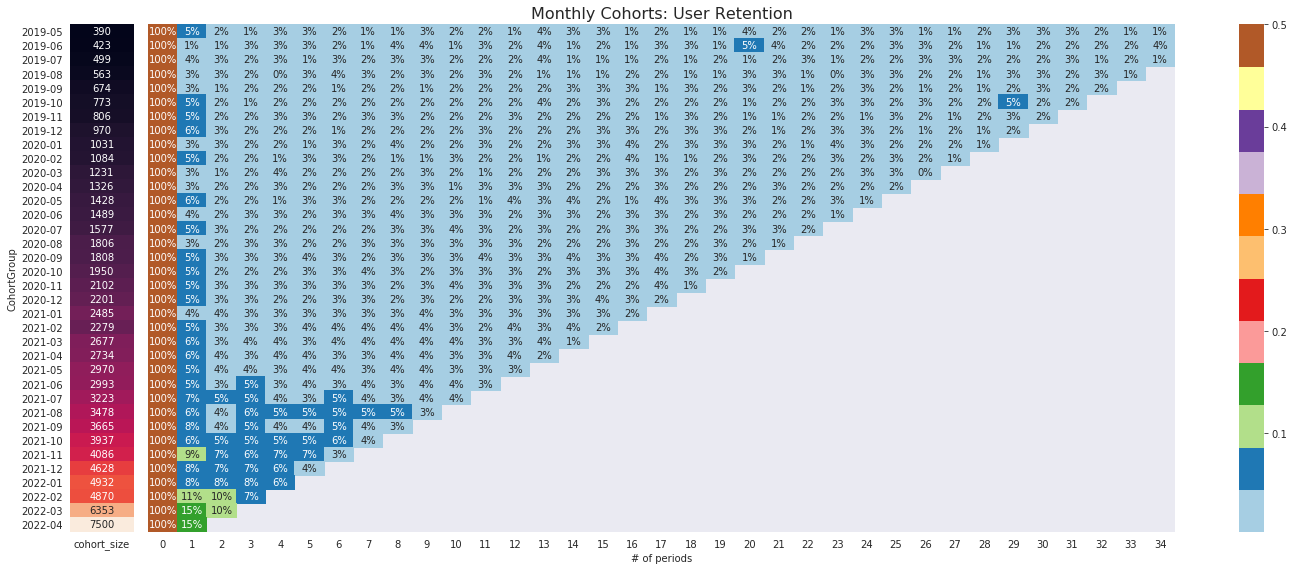

In [12]:
with sns.axes_style("dark"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                linewidth=0,
                annot=True, 
                fmt='.0%', 
                cmap='Paired', 
                vmax=0.5,
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                ax=ax[0])

    fig.tight_layout()

##### conclusion:
1. Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customers did their first purchase
2. from 2021-08, 5% of cohorts in 5 months customer still active
3. from 2021-96, 5% of cohorts were active 3 months later